In [51]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import h5py
from scipy import io
from scipy import signal
import os
import glob
import csv

In [52]:
arr = []
with open('training2017/REFERENCE.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
     for row in spamreader:
         spam = row[0].split(',')
         if spam[1] == 'A':
            arr.append(spam[0])
print (len(arr))            

738


In [53]:
l = 738 
d = 9000
r = 512
data = []
length = []
c = 0
cc = 0
cl = 0.0
ccll = 0.0
for i in range(l):
    
    db = io.loadmat('training2017/' + arr[i]) 
    dummy = db['val'][0, :]
    length.append(len(dummy))
    min = np.amin(dummy)
    max = np.amax(dummy)
    if len(dummy) < 9000:
        dummy = np.append(dummy, dummy)
        dummy = np.append(dummy, dummy)
    dummy = dummy[0:d]    
    L = np.where(dummy >= cl*max)
    LL = np.where(dummy <= ccll*min)
    if len(L[0]) > c and len(LL[0]) > cc:
       ddata = (dummy-min)/(max-min)
       ddata = signal.resample(ddata, r)
       data.append(ddata)
data = np.asarray(data).reshape(len(data), r, 1)
seq_in_af = np.copy(data)
print (seq_in_af.shape)  
#print (length)

(738, 512, 1)


In [54]:
arr = []
with open('training2017/REFERENCE.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
     for row in spamreader:
         spam = row[0].split(',')
         if spam[1] == 'N':
            arr.append(spam[0])
print (len(arr))            

5050


In [55]:
l = 5050 
d = 9000
r = 512
data = []
length = []
c = 0
cc = 0
cl = 0.0
ccll = 0.0
for i in range(l):
    
    db = io.loadmat('training2017/' + arr[i]) 
    dummy = db['val'][0, :]
    length.append(len(dummy))
    min = np.amin(dummy)
    max = np.amax(dummy)
    if len(dummy) < 9000:
        dummy = np.append(dummy, dummy)
        dummy = np.append(dummy, dummy)
    dummy = dummy[0:d]    
    L = np.where(dummy >= cl*max)
    LL = np.where(dummy <= ccll*min)
    if len(L[0]) > c and len(LL[0]) > cc:
       ddata = (dummy-min)/(max-min)
       ddata = signal.resample(ddata, r)
       data.append(ddata)
data = np.asarray(data).reshape(len(data), r, 1)
seq_in_n = np.copy(data)
print (seq_in_n.shape)  
#print (length)

(5050, 512, 1)


In [30]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Reshape, Dropout, LSTM, Bidirectional, ConvLSTM2D, MaxPooling1D, Conv1D, Flatten, UpSampling1D, ZeroPadding1D
from keras.layers import BatchNormalization, Activation, ZeroPadding2D, RepeatVector
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils
from keras.utils import plot_model
from keras.regularizers import l1_l2
import keras.backend as K
from keras.models import model_from_json
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [31]:
def classifier():
    
    model = Sequential()           
    model.add(Conv1D(filters=16, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Conv1D(filters=32, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Dropout(0.4))    
    model.add(Conv1D(filters=64, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Dropout(0.4))   
    model.add(Conv1D(filters=128, kernel_size=3, strides=2, padding='same'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(LeakyReLU(alpha=0.2)) 
    model.add(Dropout(0.4))    
    model.add(Flatten())         
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(0.0002, 0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [32]:
estimator = KerasClassifier(build_fn=classifier, epochs=100, batch_size=5, verbose=0)

In [33]:
X = np.append(seq_in_n, seq_in_af, axis=0)
Y = np.zeros((len(seq_in_n)+len(seq_in_af)))
Y[len(seq_in_n):] = 1
print(X.shape, Y.shape)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)

(1476, 512, 1) (1476,)
Epoch 1/100
1328/1328 [==============================] - 3s 2ms/step - loss: 0.8505 - acc: 0.4985
Epoch 2/100
1328/1328 [==============================] - 2s 1ms/step - loss: 0.8375 - acc: 0.4947
Epoch 3/100
1328/1328 [==============================] - 2s 1ms/step - loss: 0.8388 - acc: 0.4902
Epoch 4/100
1328/1328 [==============================] - 2s 1ms/step - loss: 0.8309 - acc: 0.4864
Epoch 5/100
1328/1328 [==============================] - 2s 1ms/step - loss: 0.7992 - acc: 0.5166
Epoch 6/100
1328/1328 [==============================] - 2s 1ms/step - loss: 0.8105 - acc: 0.4925
Epoch 7/100
1328/1328 [==============================] - 2s 1ms/step - loss: 0.7956 - acc: 0.4887
Epoch 8/100
1328/1328 [==============================] - 2s 1ms/step - loss: 0.7906 - acc: 0.4962
Epoch 9/100
1328/1328 [==============================] - 2s 1ms/step - loss: 0.7968 - acc: 0.5008
Epoch 10/100
1328/1328 [==============================] - 2s 1ms/step - loss: 0.7778 - acc: 0.5

In [50]:
print("classifier: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

classifier: 7.39% (1.15%)


In [48]:
json_file = open('gan.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("gan.h5")
print("Loaded model from disk")

Loaded model from disk


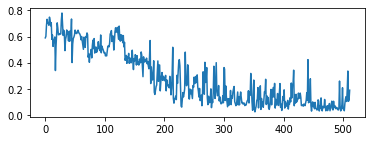

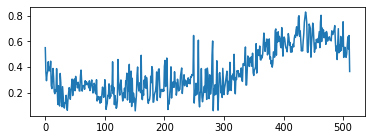

In [49]:
noise = np.random.normal(0, 1, (2, 100))
gen_seqs = loaded_model.predict(noise).reshape(2, 512, 1)
plt.figure(figsize=(6, 2))
plt.plot(gen_seqs[0,:,0])
plt.figure(figsize=(6, 2))
plt.plot(gen_seqs[1,:,0])

In [46]:
estimator.evaluate(gen_seqs, [1, 1])

Baseline: 7.39% (1.15%)
